References:- https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l03c01_classifying_images_of_clothing.ipynb

**Goal**:-  

To determine the fashion clothing style from the Handwritten Fashion clothes design

Udacity Course:- Introduction to  Tensorflow for Deep Learning 

Link:- https://classroom.udacity.com/courses/ud187

Install the tensorflow Datasets

In [0]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.3MB 2.8MB/s 
  Found existing installation: tensorflow-datasets 2.1.0
    Uninstalling tensorflow-datasets-2.1.0:
      Successfully uninstalled tensorflow-datasets-2.1.0


In [0]:
!ls

sample_data


In [0]:
! ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


**Python Imports**

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [0]:
import logging
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

**Imports Datasets**

Install the Fashion MNIST datasets which contain the 70000 images with the 10 Labels.

The individual images are of 28 x 28 pixels.

Reference:- https://github.com/zalandoresearch/fashion-mnist



In [0]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete3IRP25/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete3IRP25/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [0]:
dataset

{'test': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [0]:
train_dataset, test_dataset = dataset['train'], dataset['test']

Datasets are saved in the train and test dataset.   The images are 28 X 28 arrays with the pixel size in the range [0,255].



The images are 28 $\times$ 28 arrays, with pixel values in the range `[0, 255]`. The *labels* are an array of integers, in the range `[0, 9]`. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [0]:
# lets define the label sizes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [0]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Train examples: {}\n Test Examples: {}".format(num_train_examples, num_test_examples))

Train examples: 60000
 Test Examples: 10000


**Preprocessing the Data**

The value of all the individual images are in the range[0,255]. So, we need to normalize it in the [0.1]. Hence, we will apply the normalize function to each images 

In [0]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

The below map function applies the normalize function to each elements in the train and test datasets.

In [0]:
train_dataset = train_dataset.cache()

In [0]:
test_dataset = test_dataset.cache()

Explore the processed data

In [0]:
for image, label in test_dataset.take(1):
   break

Reshape the images in the 28 X 28 formation

In [0]:
image = image.numpy().reshape((28, 28))

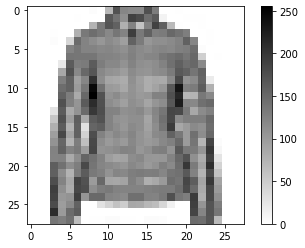

In [0]:
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()

plt.show()

Display the first 25 Images


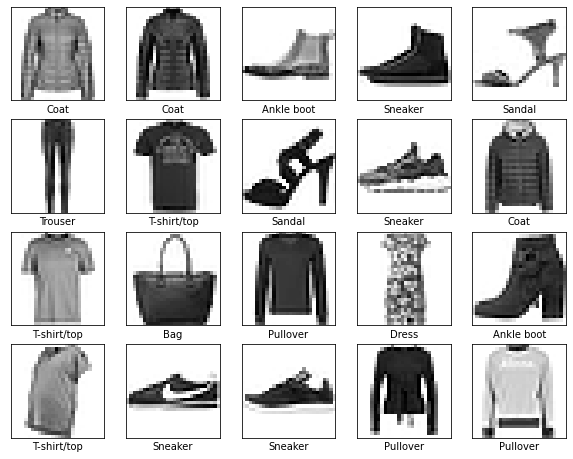

In [0]:
plt.figure(figsize=(10,10))
i = 0
for image,label in test_dataset.take(20):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i = i + 1
plt.show()

**Build the model**

Building the neural network requires the 

(1) configuration of the model

(2) compiling of the model

**We will take 3 layers**:

(1) Dense Layers for the Hidden Neural

(2) Dense Layer for the Output Label

(3) Flatten Layer to convert 2 D into 1 D array.

In [0]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10)
                             ])

In [0]:
model

**Flatten**:-  Layers to convert 2d array into the 1D array. It has no parameters



**Compile the model**:

For compiling the model, it requires many functions like:

(1) **Loss Function:**  An algorithm to calcualte how far the model's ouputs from the respective inputs

(2) **Optimizer**:  An algorithm to tune the inner parameters

(3) **Metrice**: To calculate the fractions of the images that are correctly classified. i.e: accuracy

In [0]:
# Compile the model

model.compile(optimizer='adam', 
              metrics=['accuracy'],
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

## Train the model

First, we define the iteration behavior for the train dataset:
1. Repeat forever by specifying `dataset.repeat()` (the `epochs` parameter described below limits how long we perform training).
2. The `dataset.shuffle(60000)` randomizes the order so our model cannot learn anything from the order of the examples.
3. And `dataset.batch(32)` tells `model.fit` to use batches of 32 images and labels when updating the model variables.

Training is performed by calling the `model.fit` method:
1. Feed the training data to the model using `train_dataset`.
2. The model learns to associate images and labels.
3. The `epochs=5` parameter limits training to 5 full iterations of the training dataset, so a total of 5 * 60000 = 300000 examples.

(Don't worry about `steps_per_epoch`, the requirement to have this flag will soon be removed.)

In [0]:
batch_size=32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(batch_size)

In [0]:
test_dataset = test_dataset.cache().batch(batch_size)

In [0]:
test_dataset

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.uint8, tf.int64)>

In [0]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/batch_size))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 3.1952 - accuracy: 0.6914
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6845 - accuracy: 0.7443
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5603 - accuracy: 0.8049
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5308 - accuracy: 0.8170
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5046 - accuracy: 0.8267


From the model above, we got the 83% accuracy

**Evaluate the accuracy**:



In [0]:
test_loss = test_accuracy = model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))

313/313 [==============================] - 2s 6ms/step - loss: 0.5925 - accuracy: 0.8053


From the test dataset, we got the accuracy 81% with the test images.

### Predictions

In [0]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [0]:
predictions

array([[ 2.06600761e+01,  9.93353462e+00,  2.80631618e+01,
         2.08711090e+01,  3.15426464e+01, -1.62937698e+01,
         2.98600082e+01, -3.98381615e+01,  1.42566776e+01,
        -8.68863602e+01],
       [ 2.83224411e+01,  1.35492134e+01,  3.72042427e+01,
         2.87767735e+01,  4.12414780e+01, -1.28009176e+01,
         4.11945572e+01, -3.69988747e+01,  1.81766090e+01,
        -9.74316483e+01],
       [-3.61497040e+01,  9.13702679e+00, -4.40424004e+01,
         4.64984179e+00, -2.95753899e+01,  4.64340782e+01,
        -1.90911460e+00,  4.69121666e+01,  1.77621784e+01,
         4.90751877e+01],
       [-3.00240498e+01,  2.10989170e+01, -4.70321312e+01,
         1.47902451e+01, -4.55720139e+01,  6.43895569e+01,
        -1.28519940e+00,  6.93277817e+01,  3.47355423e+01,
         6.79813156e+01],
       [ 1.30968904e+01,  1.88571846e+00, -3.05665245e+01,
        -3.71086540e+01, -1.89812355e+01,  7.67576294e+01,
        -4.84169655e+01,  6.60615997e+01,  3.35770531e+01,
         6.

In [0]:
predictions[0]

array([ 20.660076,   9.933535,  28.063162,  20.871109,  31.542646,
       -16.29377 ,  29.860008, -39.83816 ,  14.256678, -86.88636 ],
      dtype=float32)

Predictions is an array of the 10 numbers which declares the possibility of the labels

In [0]:
# get the max values
np.argmax(predictions[0])

4

In [0]:
test_labels[0]

4

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  predictions_array = tf.nn.softmax(predictions_array)
  print(predictions_array)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

tf.Tensor(
[1.5436863e-05 3.3890754e-10 2.5332514e-02 1.9063798e-05 8.2186264e-01
 1.3794528e-21 1.5277025e-01 8.2131391e-32 2.5562208e-08 0.0000000e+00], shape=(10,), dtype=float32)


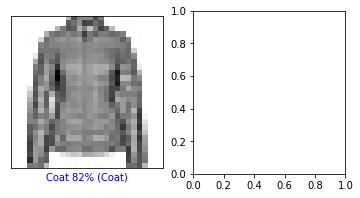

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
# plot_value_array(i, predictions, test_labels)

tf.Tensor(
[1.5436863e-05 3.3890754e-10 2.5332514e-02 1.9063798e-05 8.2186264e-01
 1.3794528e-21 1.5277025e-01 8.2131391e-32 2.5562208e-08 0.0000000e+00], shape=(10,), dtype=float32)
tf.Tensor(
[1.2429891e-06 4.7701941e-13 8.9492099e-03 1.9578588e-06 5.0714684e-01
 1.7171932e-24 4.8390073e-01 5.3183721e-35 4.8774006e-11 0.0000000e+00], shape=(10,), dtype=float32)
tf.Tensor(
[8.1869142e-38 3.8097623e-18 0.0000000e+00 4.2868432e-20 5.8655704e-35
 6.0089841e-02 6.0760194e-23 9.6924193e-02 2.1220381e-14 8.4298593e-01], shape=(10,), dtype=float32)
tf.Tensor(
[0.0000000e+00 8.9450203e-22 0.0000000e+00 1.6283985e-24 0.0000000e+00
 5.6554619e-03 1.6993498e-31 7.8906333e-01 7.4798552e-16 2.0528117e-01], shape=(10,), dtype=float32)
tf.Tensor(
[2.2515050e-28 3.0445533e-33 0.0000000e+00 0.0000000e+00 0.0000000e+00
 9.9995601e-01 0.0000000e+00 2.2633632e-05 1.7656104e-19 2.1349782e-05], shape=(10,), dtype=float32)
tf.Tensor(
[3.8751955e-13 9.9999988e-01 6.9320261e-10 9.0706411e-09 7.6439044e-08
 0.

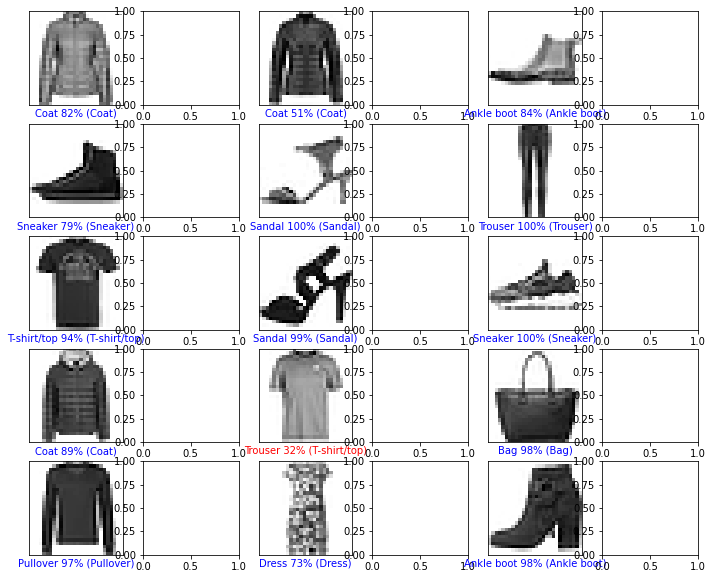

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
#   plot_value_array(i, predictions, test_labels)

**FINISH**

We successfully determined the fashion clothing classification using the neural networks.